In [19]:
import pandas as pd
import numpy as np
runningOnDrive = False
if(runningOnDrive == False):
    alt.renderers.enable('notebook')

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [20]:
if(runningOnDrive == False):
    df=pd.read_csv('datasets/gdp2.csv')
else:
    df=pd.read_csv('My drive/gdp2.csv')
df.head()

,Entity,Code,Year,GDP per capita (Bolt and van Zanden (2015)) (international dollars (in 1990 prices))
0,Afghanistan,AFG,1950,645.0
1,Afghanistan,AFG,1951,653.0
2,Afghanistan,AFG,1952,664.0
3,Afghanistan,AFG,1953,692.0
4,Afghanistan,AFG,1954,694.0


In [21]:
df.columns = ['country', 'code', 'year', 'gdp']
df.head()

,country,code,year,gdp
0,Afghanistan,AFG,1950,645.0
1,Afghanistan,AFG,1951,653.0
2,Afghanistan,AFG,1952,664.0
3,Afghanistan,AFG,1953,692.0
4,Afghanistan,AFG,1954,694.0


In [22]:
list_countries = df.values.tolist()

In [23]:
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus',
          'Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus',
          'Czechia','Czech Republic','Denmark','Estonia','Finland','France',
          'Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy',
          'Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta',
          'Moldova','Monaco','Montenegro','Netherlands','North Macedonia',
          'Macedonia','Norway','Poland','Portugal','Romania','Russia',
          'Russian Federation','San Marino','Serbia','Slovakia','Slovak Republic',
          'Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine',
          'United Kingdom','UK','Vatican City']

#Vatican city has no GDP data, some countries are added twice as they have different names below 


In [24]:
listeu=[]
europe_GDP = []
#europe_GDP.append(list_countries[['country', 'code', 'year', 'gdp']]) 

for x in list_countries:
  for y in europe:
    if x[0] == y:
      europe_GDP.append(x)
      listeu.append(x[0])
 

In [25]:
europe_df = pd.DataFrame(europe_GDP) 
europe_df.columns = ['country', 'code', 'year', 'gdp']
europe_df.head()

,country,code,year,gdp
0,Albania,ALB,1870,446.0
1,Albania,ALB,1890,598.0
2,Albania,ALB,1900,685.0
3,Albania,ALB,1910,780.0
4,Albania,ALB,1913,811.0


In [26]:
europe_df = europe_df[europe_df.year > 1940]
europe_df.head()

europe_df.country.unique()

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Macedonia', 'Moldova', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'Ukraine', 'United Kingdom'], dtype=object)

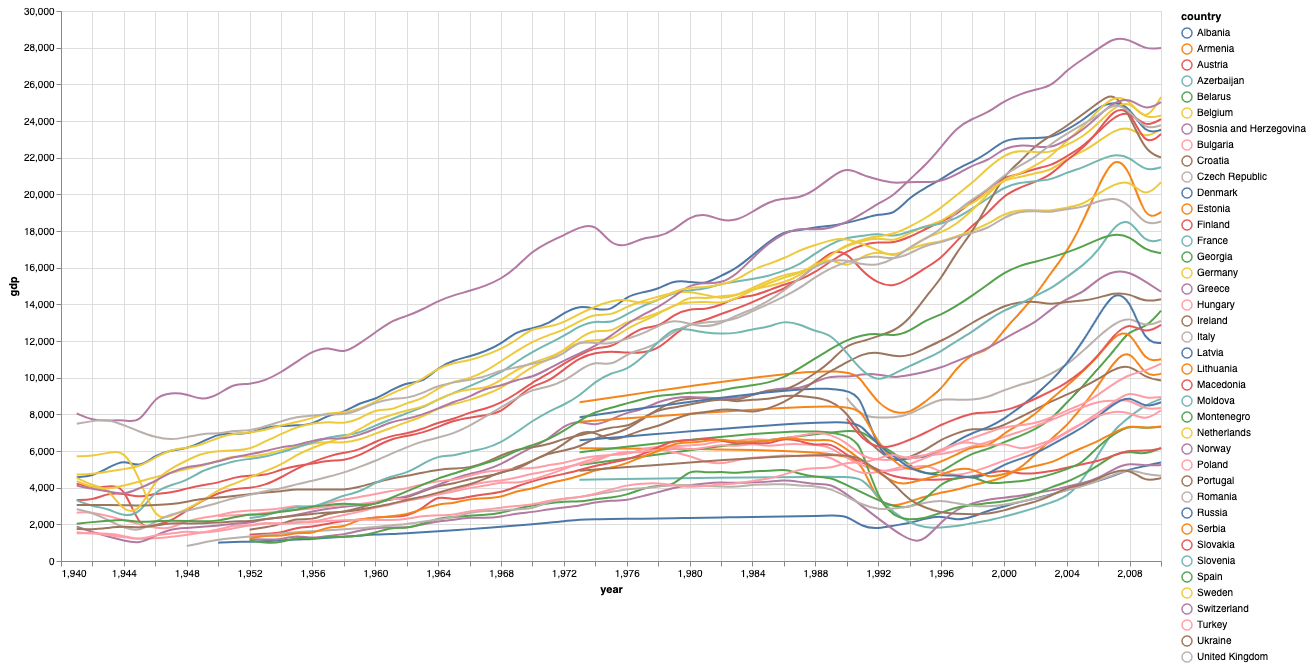

In [27]:
import altair as alt
import pandas as pd
import numpy as np


# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['year'], empty='none')

# The basic line
line = alt.Chart(europe_df).mark_line(interpolate='basis').encode(
    x='year:Q',
    y='gdp:Q',
    color='country:N'
)


# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(europe_df).mark_point().encode(
    x='year:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'country:N', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(europe_df).mark_rule(color='gray').encode(
    x='year:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=1100, height=550
)

In [28]:
spain = europe_df.loc[europe_df['country'] == 'Spain']
france = europe_df.loc[europe_df['country'] == 'France']

spain.head()

,country,code,year,gdp
3123,Spain,ESP,1941,2030.0
3124,Spain,ESP,1942,2126.0
3125,Spain,ESP,1943,2188.0
3126,Spain,ESP,1944,2271.0
3127,Spain,ESP,1945,2102.0


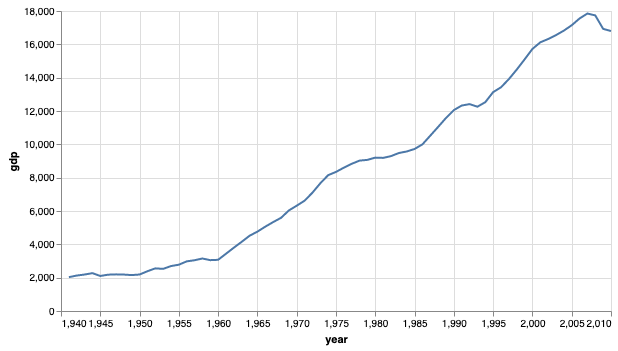

In [29]:

base = alt.Chart(spain).properties(width=550)

line1 = base.mark_line().encode(
    x='year',
    y='gdp'
)


line1

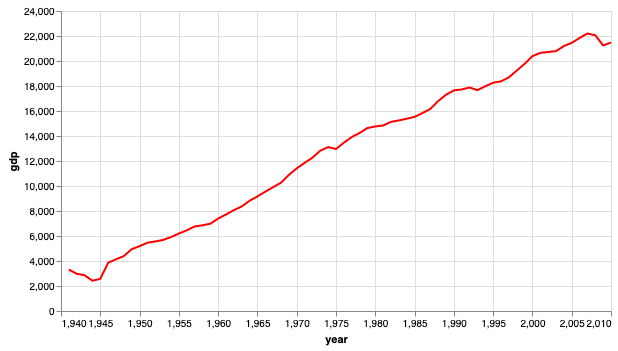

In [30]:

base = alt.Chart(france).properties(width=550)

line2 = base.mark_line().encode(
    x='year',
    y='gdp',
    color=alt.value('red')

)


line2

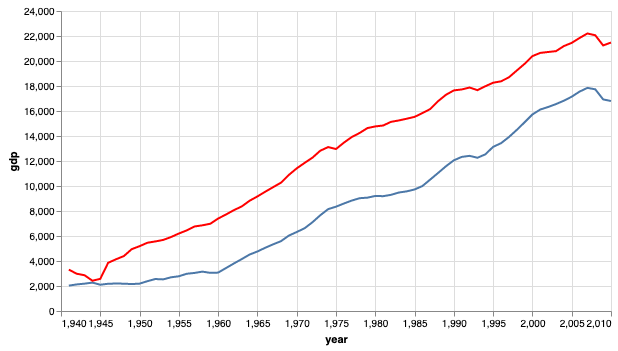

In [31]:
line1 + line2

#Medals

In [32]:
if (runningOnDrive == False): 
    df=pd.read_excel('datasets/medals.xlsx')
else: 
    df=pd.read_excel('My Drive/medals.xlsx')
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [33]:
#groupby year and NOC 
df.loc[df['NOC'] == 'HUN']
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [34]:
medals_per_year = df.groupby('NOC')['Edition'].value_counts()

d = pd.DataFrame([medals_per_year])
d = d.T    
d.rename(columns={'Edition':'Medals'}, inplace=True)
d.head()

Medals
NOC Edition        
AFG 2008          1
AHO 1988          1
ALG 2000          5
    1996          3
    1984          2

In [35]:
a = d.reset_index()
medals_list = a.values.tolist()

In [36]:
eu_codes = set(europe_df['code'].values.tolist())

eu_medals = []

for x in medals_list:
  for y in eu_codes:
    if x[0] == y:
      eu_medals.append(x)
 

In [37]:
medals_europe_df = pd.DataFrame(eu_medals)
medals_europe_df.columns = ['code','year','medals']
medals_europe_df.head()

,code,year,medals
0,ARM,2008,6
1,ARM,1996,2
2,ARM,2000,1
3,AUT,1936,50
4,AUT,1912,14


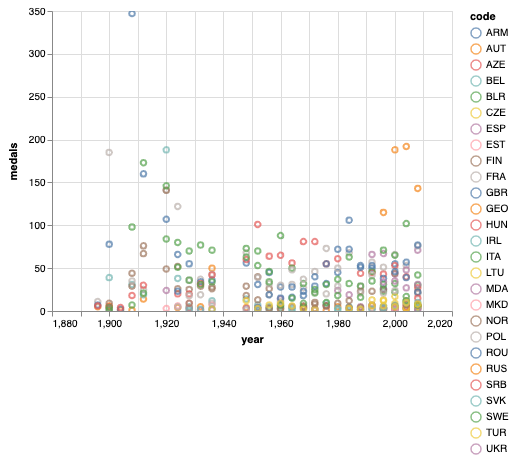

In [38]:
import altair as alt

alt.Chart(medals_europe_df).mark_point().encode(
    alt.X('year:Q',
        scale=alt.Scale(domain=(1880, 2020))
    ),
    y='medals:Q',
    color='code',
).interactive()


In [39]:
#by country
esp = medals_europe_df.loc[medals_europe_df['code'] == 'ESP']
fra = medals_europe_df.loc[medals_europe_df['code'] == 'FRA']
cze = medals_europe_df.loc[medals_europe_df['code'] == 'CZE']

In [41]:
import altair as alt

Esp = alt.Chart(esp).mark_point().encode(
    alt.X('year:Q',
        scale=alt.Scale(domain=(1880, 2020))
    ),
    y='medals:Q'
).interactive()


Fra = alt.Chart(fra).mark_point().encode(
    alt.X('year:Q',
        scale=alt.Scale(domain=(1880, 2020))
    ),
    y='medals:Q',
    color=alt.value('red')
).interactive()



Cze = alt.Chart(cze).mark_point().encode(
    alt.X('year:Q',
        scale=alt.Scale(domain=(1880, 2020))
    ),
    y='medals:Q',
    color=alt.value('green')
).interactive()


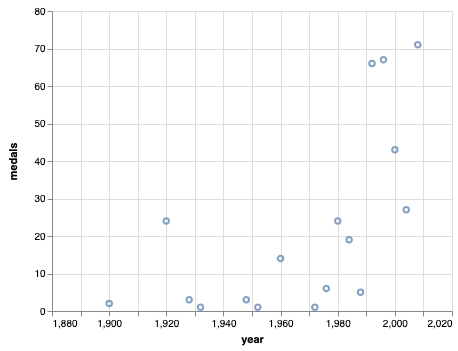

In [42]:
Esp

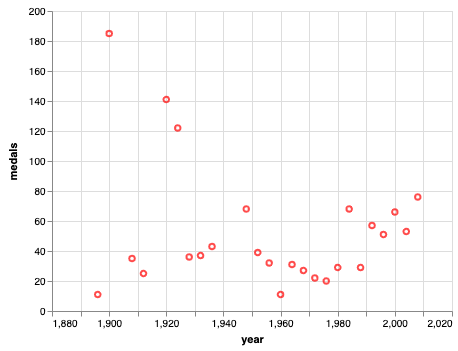

In [43]:
Fra

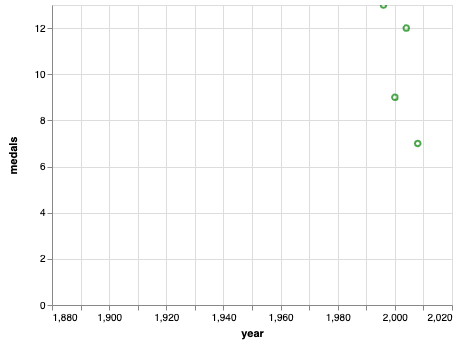

In [44]:
Cze

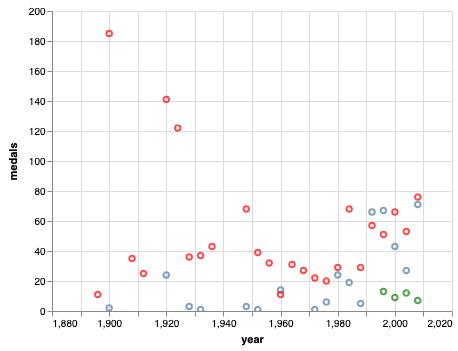

In [45]:
Esp + Fra + Cze

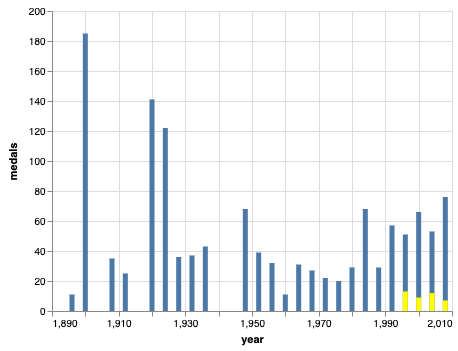

In [46]:
a = alt.Chart(fra).mark_bar().encode(
    x='year',
    y='medals'
)

b = alt.Chart(cze).mark_bar().encode(
    x='year',
    y='medals',
    color=alt.value('yellow'),

    
)

a+b

In [47]:
esp.head()

,code,year,medals
62,ESP,2008,71
63,ESP,1996,67
64,ESP,1992,66
65,ESP,2000,43
66,ESP,2004,27


In [48]:
spain.head()

,country,code,year,gdp
3123,Spain,ESP,1941,2030.0
3124,Spain,ESP,1942,2126.0
3125,Spain,ESP,1943,2188.0
3126,Spain,ESP,1944,2271.0
3127,Spain,ESP,1945,2102.0


In [49]:
spain = spain.set_index('year')
esp = esp.set_index('year')
spain.head()

,country,code,gdp
year,,,
1941,Spain,ESP,2030.0
1942,Spain,ESP,2126.0
1943,Spain,ESP,2188.0
1944,Spain,ESP,2271.0
1945,Spain,ESP,2102.0


In [50]:
df_merged = spain.merge(esp, how='outer', left_index=True, right_index=True)

#dropping missing medals or gdp
df_merged = df_merged.dropna(subset=['medals', 'gdp'])
df = df_merged.reset_index()
gdp_medals = df
df.head()

,year,country,code_x,gdp,code_y,medals
0,1948,Spain,ESP,2186.0,ESP,3.0
1,1952,Spain,ESP,2558.0,ESP,1.0
2,1960,Spain,ESP,3072.0,ESP,14.0
3,1972,Spain,ESP,7099.0,ESP,1.0
4,1976,Spain,ESP,8599.0,ESP,6.0


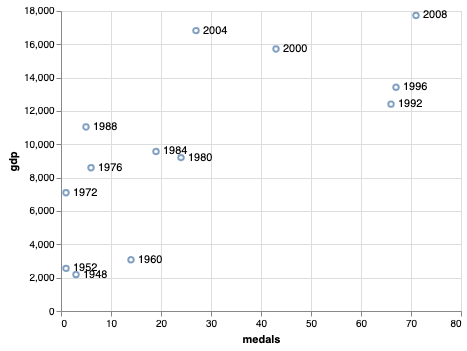

In [51]:
points = alt.Chart(df).mark_point().encode(
    x='medals:Q',
    y='gdp:Q'
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='year'
)

points + text

#Population

In [52]:
if (runningOnDrive == False):
    df=pd.read_csv('datasets/population.csv')
else: 
    df=pd.read_csv('My Drive/population.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN,NaN


In [53]:
df = df.drop(columns=['Indicator Name', 'Indicator Code','2018'])
df = df.iloc[:, :-1]

df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [54]:
columns = list(df.columns.values)
eu_pop = df.values.tolist()

In [55]:
eu_codes = set(europe_df['code'].values.tolist())

eu_population = []

for x in eu_pop:
  for y in eu_codes:
    if x[1] == y:
      eu_population.append(x)
 

In [56]:
cou = eu_population[12][3:]

#x = pd.DataFrame(eu_population[1])
cou_pop = []

for x in cou:
  b = []
  b.append(eu_population[12][1])
  b.append(x)
  cou_pop.append(b)

a = pd.DataFrame(cou_pop)

In [57]:
years = columns[2:-1]
b = pd.DataFrame(years)


In [58]:
result = pd.concat([a, b], axis=1)
result.columns = ['code','population','year']
result.head()
population_df = result

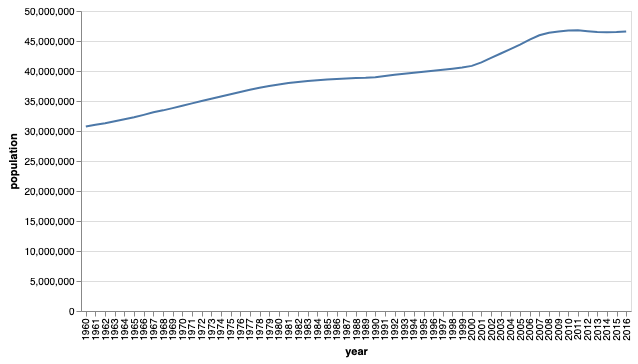

In [59]:

base = alt.Chart(result).properties(width=550)

line = base.mark_line().encode(
    x='year',
    y='population'
)


line

In [60]:
import altair as alt

gdp_medals

,year,country,code_x,gdp,code_y,medals
0,1948,Spain,ESP,2186.000000,ESP,3.0
1,1952,Spain,ESP,2558.000000,ESP,1.0
2,1960,Spain,ESP,3072.000000,ESP,14.0
3,1972,Spain,ESP,7099.000000,ESP,1.0
4,1976,Spain,ESP,8599.000000,ESP,6.0
5,1980,Spain,ESP,9203.000000,ESP,24.0
6,1984,Spain,ESP,9571.000000,ESP,19.0
7,1988,Spain,ESP,11046.000000,ESP,5.0
8,1992,Spain,ESP,12412.978672,ESP,66.0
9,1996,Spain,ESP,13423.043523,ESP,67.0


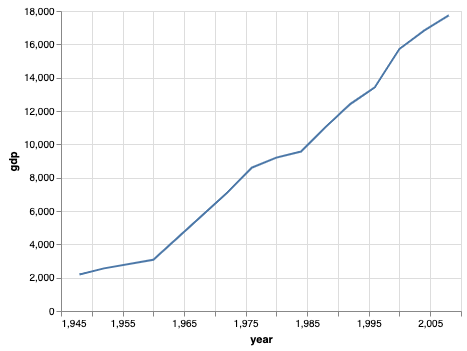

In [61]:
import pandas as pd
import altair as alt



chart1 = alt.Chart(gdp_medals).mark_line().encode(x='year', y='gdp')
chart2 = alt.Chart(gdp_medals).mark_line().encode(x='year', y='medals')
chart3 = alt.Chart(result).mark_line().encode(x='year', y='population')

chart1 

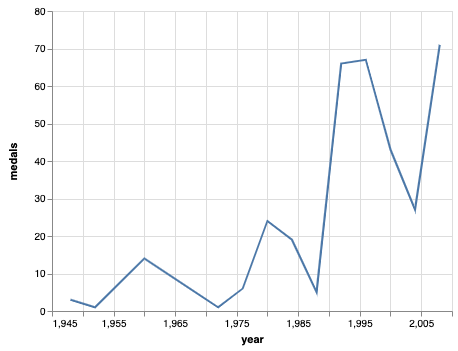

In [62]:
chart2

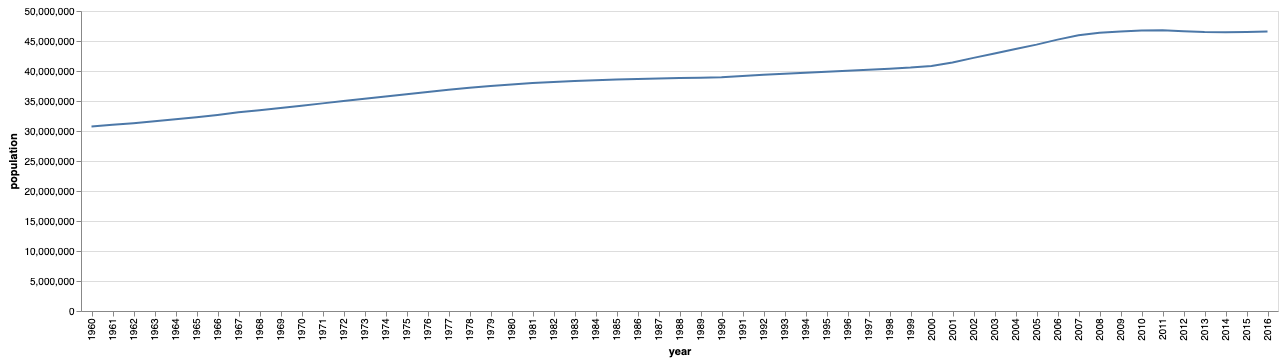

In [63]:
chart3

In [64]:
#1) total medals vs gdp     
#2) total medals vs population
#where each point is a country (so just do it for one year, for example the latest)

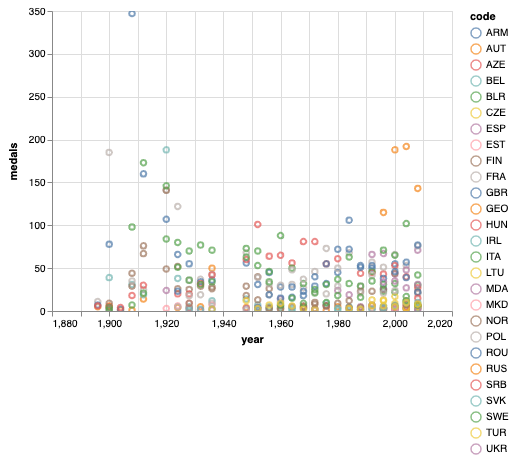

In [65]:
import altair as alt

alt.Chart(medals_europe_df).mark_point().encode(
    alt.X('year:Q',
        scale=alt.Scale(domain=(1880, 2020))
    ),
    y='medals:Q',
    color='code',
).interactive()


In [66]:
medals_europe_df

m = medals_europe_df.loc[medals_europe_df['year'] == 2008]
e = europe_df.loc[europe_df['year'] == 2008]
p = population_df[population_df['year'] == 2008]
e = e.reset_index()


In [67]:
m = m.set_index('code')
e = e.set_index('code')
e.head()

,index,country,year,gdp
code,,,,
ALB,64,Albania,2008,5010.031778
ARM,86,Armenia,2008,11647.337625
AUT,232,Austria,2008,24565.484496
AZE,254,Azerbaijan,2008,7870.788527
BLR,276,Belarus,2008,12638.334368


In [68]:
#me = e.merge(m, how='outer', left_index=True)

merged =e.merge(m, on='code')

merged.columns = ['code','index','year1','gdp','year2','medals']
merged.head()

,code,index,year1,gdp,year2,medals
code,,,,,,
ARM,86,Armenia,2008,11647.337625,2008,6
AUT,232,Austria,2008,24565.484496,2008,3
AZE,254,Azerbaijan,2008,7870.788527,2008,7
BLR,276,Belarus,2008,12638.334368,2008,30
BEL,448,Belgium,2008,23701.296142,2008,5


In [69]:
#1) total medals vs gdp     
#2) total medals vs population
#where each point is a country (so just do it for one year, for example the latest)



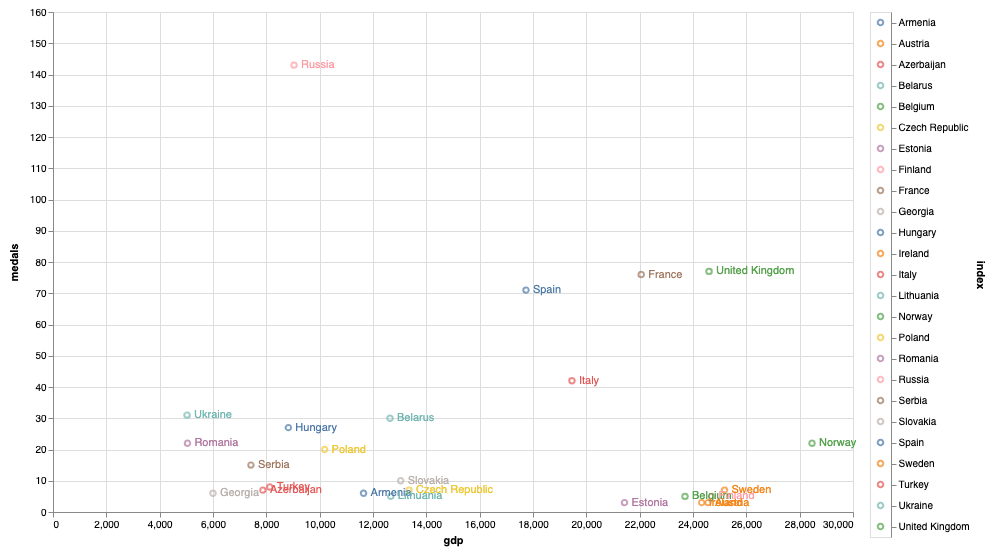

In [81]:
import altair as alt
import pandas as pd

selection = alt.selection_multi( fields=['index'])
color = alt.condition(selection,
                      alt.Color('index:N', legend=None),
                      alt.value('lightgray'))

points = alt.Chart(merged).mark_point().encode(
    x='gdp:Q',
    y='medals:Q',
    color=color
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index'
).properties(
    width=800, height=500
)

legend = alt.Chart(merged).mark_point().encode(
    y=alt.Y('index:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)


chart = points + text | legend

chart

In [83]:
if (runningOnDrive == False):
            chart.save("outputs/charts/gdp.html")
else: 
    chart.save("My Drive/gdp.html")